## Project: Creating Customer Segments

## Getting Started

In this project, I will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from IPython.display import display # Allows the use of display() for DataFrames


import visuals as vs
%matplotlib inline

try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    display(data.head())
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset.


In [2]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


###  Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. 

In [3]:

indices = [17,200,400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5876,6157,2933,839,370,4478
1,3067,13240,23127,3941,9959,731
2,4446,906,1238,3576,153,1014


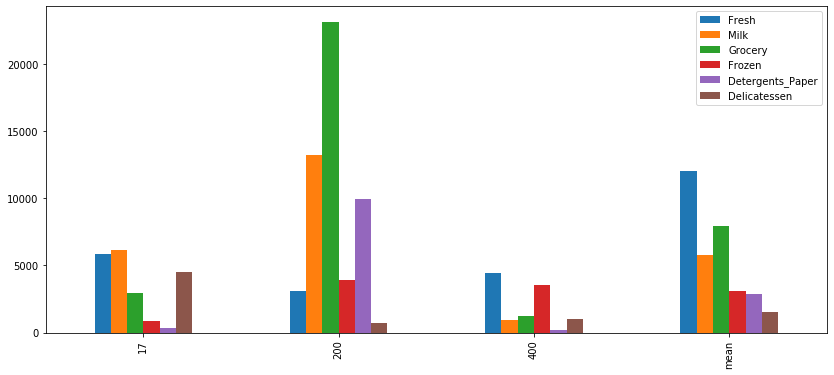

In [4]:
import seaborn as sns
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))


* Sample 0 : In this sample, customer consumed more milk,fresh,delicatessen and grocery. It could be some restaurant as it consumes more fresh, delicatessen, milk.
* Sample 1 : In this sample, customer consumed more milk and grocery than any other. It could possibly be some cafe.
* Sample 2 : In this sample, customer consumed more fresh and frozen. It could be some retailer store.

### Visualizing Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. 

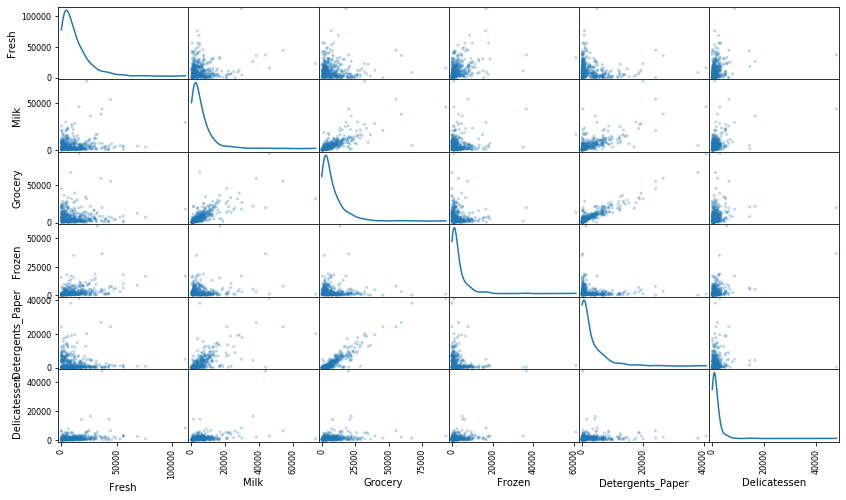

In [5]:
scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

* The datapoints are more clusered near zero, and the distribution is pretty much skewed as large data points are near to 0 than any other.And in addition there are many outliers. 
* From the graph we can see that Grocery-detergent are correlated and also milk-grocery and milk-detergent are also a little bit correlated.

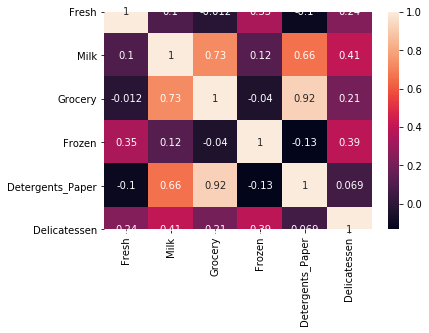

In [6]:
import seaborn as sb
corr = data.corr()
hm = sb.heatmap(corr, annot = True)


* From the above heat map we can confirm that detergent and grocery are highly correalted and then Grocery-Milk followed by Grocery-Detergent.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. 

### Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.


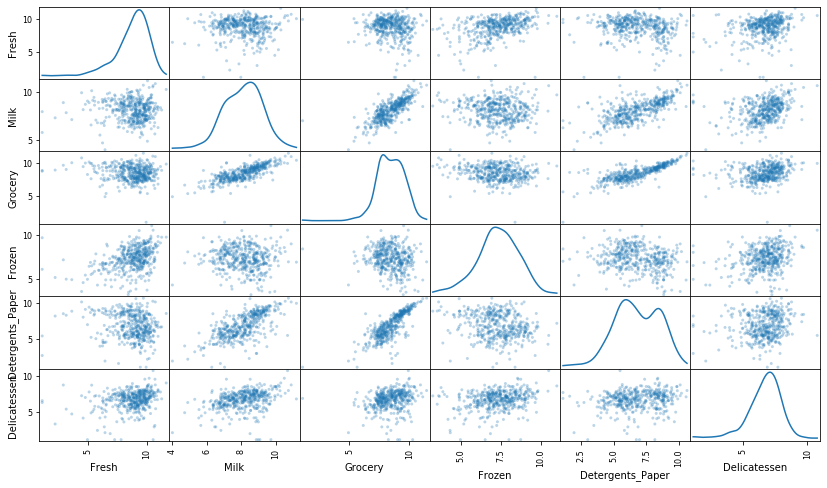

In [7]:
log_data = np.log(data)

log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature appeared much more normal. For any pairs of features we may identify earlier as being correlated.


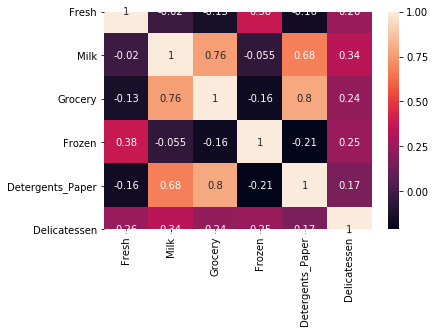

In [8]:
corr = log_data.corr()
hm = sb.heatmap(corr, annot = True)

We can observe that the correlation values have been changed. Some have been increased and some have been decreased.

### Outlier Detection


In [9]:


for feature in log_data.keys():
    
    
    Q1 = np.percentile(log_data[feature], 25)
    
    
    Q3 = np.percentile(log_data[feature], 75)
    
    
    step = 1.5*(Q3 - Q1)
    
    
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [10]:
outliers  = [65,66,128,75,154,81,95,96,171,193,218,304,305,338,353,357,412,86,98,356,38,57,145,175,264,325,420,429,439,161,109,137,142,154,183,184,187,203,233,285,289,343]

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


* By observing outliers in all the features, data points 65,66,128,75,154 are repeated and are outliers for morethan one feature.
* They are more deviated from the rest of the points and adding them defenitly disrupt the acccuracy of models.
* I have added the repeated points into the outliers list as they should be definitly removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.


             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4964 -0.0900  0.4123   0.4514 -0.1229   
Dimension 2              0.2304 -0.6138 -0.1331  -0.0780 -0.6238   
Dimension 3              0.1045 -0.7425  0.1528  -0.0176  0.2921   
Dimension 4              0.0971  0.2472  0.1406   0.0691 -0.7097   
Dimension 5              0.0484  0.0118  0.7082   0.3171  0.0672   
Dimension 6              0.0232 -0.0497 -0.5174   0.8274  0.0479   

             Detergents_Paper  Delicatessen  
Dimension 1            0.7595        0.1617  
Dimension 2            0.0422       -0.4566  
Dimension 3           -0.2274        0.5366  
Dimension 4           -0.3210        0.5547  
Dimension 5           -0.4729       -0.4119  
Dimension 6           -0.2072       -0.0083  


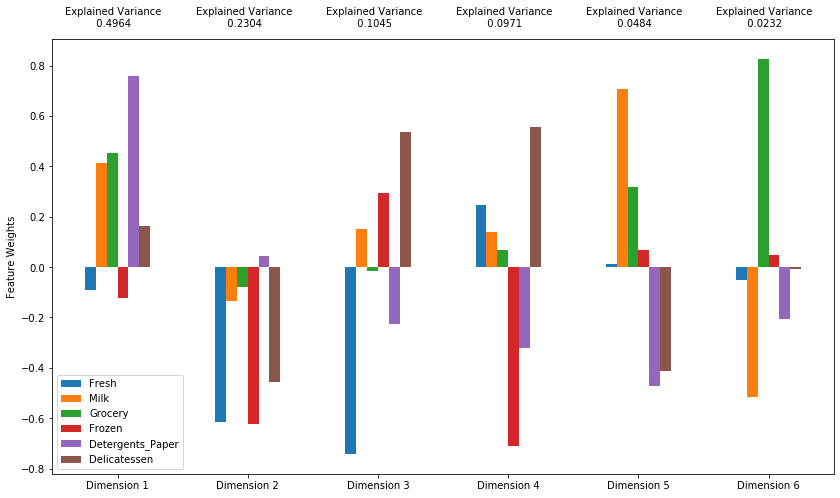

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6).fit(good_data)

pca_samples = pca.transform(log_samples)

pca_results = vs.pca_results(good_data, pca)
print(pca_results)

In total, the first and second principal component analysis explain 72.68% of the variance in the data.

The first four principal components explain 92.84% of the variance in the data 

Dimension 1 

This first principal component only has a strong correlation with one of the variables, Detergents Paper. As Detergents Papers increases, the first principal component increases. It can be seen that there is a positive correlation that means both milk and grocery also increase.

Dimension 2 

The second principal component is best described by Fresh and Frozen. That is to say, the second component increases based on decreasing values for fresh and frozen. Delicatessen can also be seen to have a strong correlation with these two leading variables.

Dimension 3 

The third principal component is best described by the positive influence of delicatessen, and to a lesser degree, frozen, and a negative influence of fresh. This is to say, that those who make purchases from the delicatessen and frozen areas, are a lot less likely to purchase fresh, and to a smaller extent, Detergents Paper.

Dimension 4 

The fourth principal increases with decreasing frozen and increasing delicatessen. It can be said that this customer who buys large quantities of Delicatessen, are significantly less likely to purchase Frozen.

Dimension 5 

The fifth principal component increases with positive influence of milk, and the negative influence of detergents paper and delicatessen. It can be said that this customer doesn't buy both based on data

Dimension 6 

The sixth principal component increases with the a positive influence of grocery, and a negative influence of milk. This customer is less likely to purchase milk if they have purchased grocery


### Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [12]:

pca = PCA(n_components = 2).fit(good_data)
reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.


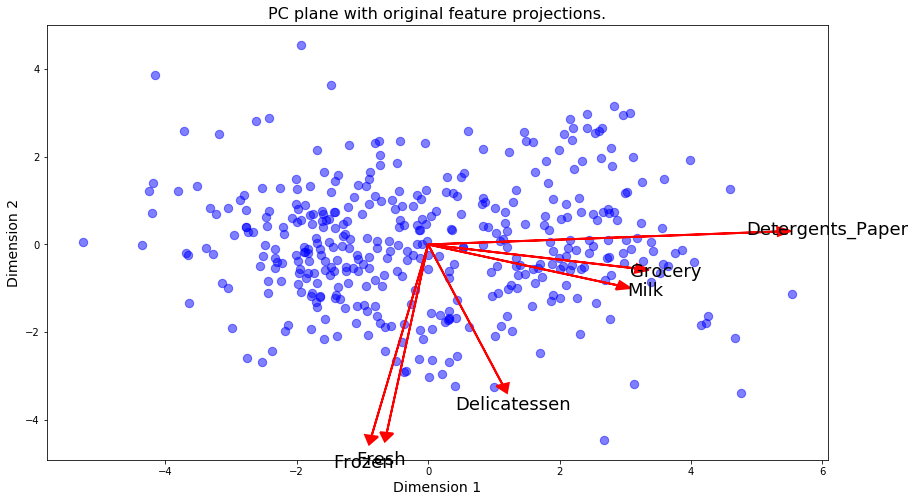

In [13]:
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower left corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 


## Clustering

### Creating Clusters
Depending on the problem, the number of clusters that we expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.



In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=2, random_state=29).fit(reduced_data)

preds = clusterer.predict(reduced_data)

centers = clusterer.cluster_centers_

sample_preds = clusterer.predict(pca_samples)

score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
print("k = 2 score is {}".format(score.round(3)))
    


k = 2 score is 0.445


Silhouette score for different number of clusteres is :

* k = 2 score is 0.426
* k = 3 score is 0.36
* k = 4 score is 0.329
* k = 5 score is 0.348
* k = 6 score is 0.362
* k = 7 score is 0.353
* k = 8 score is 0.367
* k = 9 score is 0.367
* k = 10 score is 0.369

> From the above , 2 clusters gave the best score with ~0.42.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

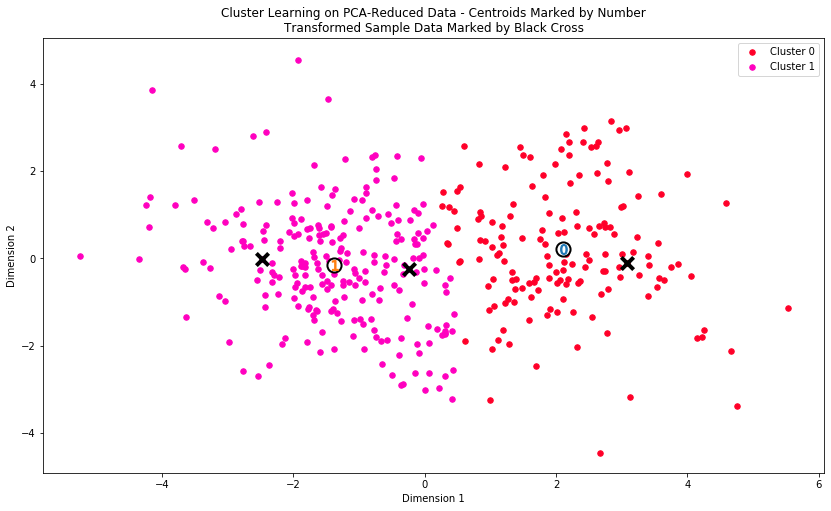

In [15]:
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.




In [16]:

log_centers = pca.inverse_transform(centers)


true_centers = np.exp(log_centers)


segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5416.0,7781.0,11540.0,1125.0,4442.0,1137.0
Segment 1,9308.0,1930.0,2446.0,2177.0,306.0,764.0


In [17]:
display(data.median())
print("Centers varied from median")
display(true_centers -  data.median())
print("Centers varied from mean")
display(true_centers -  data.mean().round(2))

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

Centers varied from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3088.0,4154.0,6784.5,-401.0,3625.5,171.5
Segment 1,804.0,-1697.0,-2309.5,651.0,-510.5,-201.5


Centers varied from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-6584.3,1984.73,3588.72,-1946.93,1560.51,-387.87
Segment 1,-2692.3,-3866.27,-5505.28,-894.93,-2575.49,-760.87



Using the statistics we got the above tables.
* *Segment 0:*
In segment 0 the customers used milk, grocery and detergents_paper most.These could most probably be cafes, supermarkets, restaurants.
* *Segment 1:*
In segment 1 the fresh, frozen are above the median. This may represent the vegetable markets,meat markets.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

For the A/B testing, we need to test based on clusters (customer segments). For the purpose of this question 'A' will represent a 5-day delivery service and 'B' will represent a 3-day delivery service.



Just by intuition we can say that that would have a little segment 0 as the products like groceries and detergents can last more days. So changing 5 days to 3 days may have no effect. But it do contain lot of milk products which may not last more days and can have a impact on customers. In case of segment 1 it contains all fresh products, so the change in days will really have a big impact. 
In order to confirm the changing of delivery service it is advisable to run A/B tests where two groups from each segment are selected and the change is applied on one group and the other is left normal. By viewing the stats and results we can come to a conclusion whether to change the timings in delivery service.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.


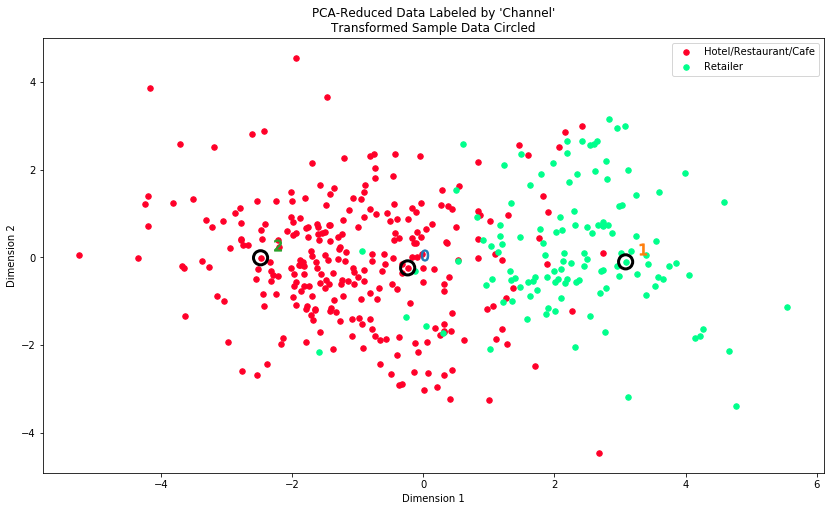

In [18]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)